<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/ema50ema20standardization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
!pip install yfinance

In [59]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns 
%matplotlib inline
matplotlib.style.use('fivethirtyeight')

In [60]:
nifty = yf.download('^nsei',start='2019-01-01')

[*********************100%***********************]  1 of 1 completed


In [61]:
nifty['ema50'] = nifty['Close'].ewm(span=50, adjust=False).mean()
nifty['ema20'] = nifty['Close'].ewm(span=20, adjust=False).mean()

In [62]:
data_subset = nifty[['Close','ema50','ema20']]
data_subset.columns=['close','close1','close2']

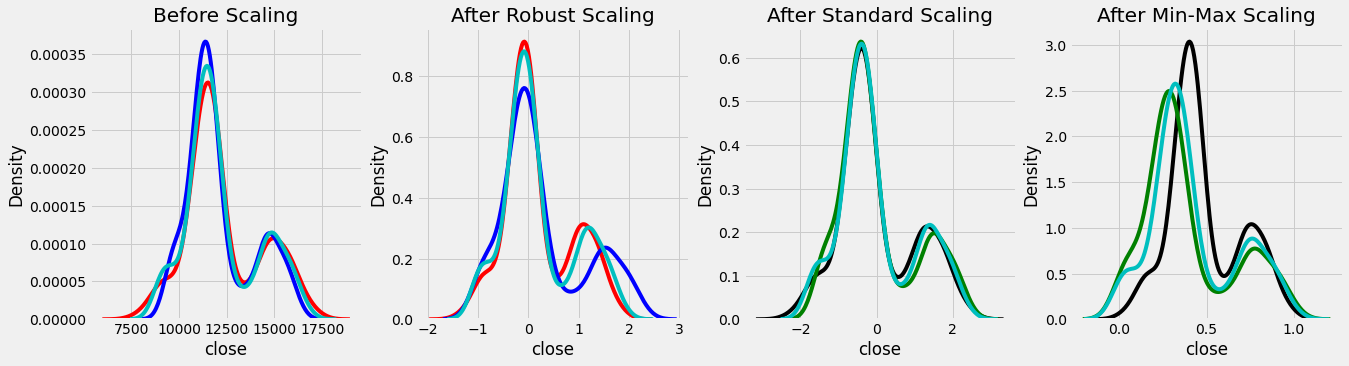

In [63]:
# data
x = data_subset
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['close','close1','close2'])

scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['close','close1','close2'])

scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['close','close1','close2'])

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')

sns.kdeplot(x['close'], ax = ax1, color ='r')
sns.kdeplot(x['close1'], ax = ax1, color ='b')
sns.kdeplot(x['close2'], ax = ax1, color ='c')
ax2.set_title('After Robust Scaling')

sns.kdeplot(robust_df['close'], ax = ax2, color ='red')
sns.kdeplot(robust_df['close1'], ax = ax2, color ='blue')
sns.kdeplot(robust_df['close2'], ax = ax2, color ='c')
ax3.set_title('After Standard Scaling')

sns.kdeplot(standard_df['close'], ax = ax3, color ='black')
sns.kdeplot(standard_df['close1'], ax = ax3, color ='g')
sns.kdeplot(standard_df['close2'], ax = ax3, color ='c')
ax4.set_title('After Min-Max Scaling')

sns.kdeplot(minmax_df['close'], ax = ax4, color ='black')
sns.kdeplot(minmax_df['close1'], ax = ax4, color ='g')
sns.kdeplot(minmax_df['close2'], ax = ax4, color ='c')
plt.show()

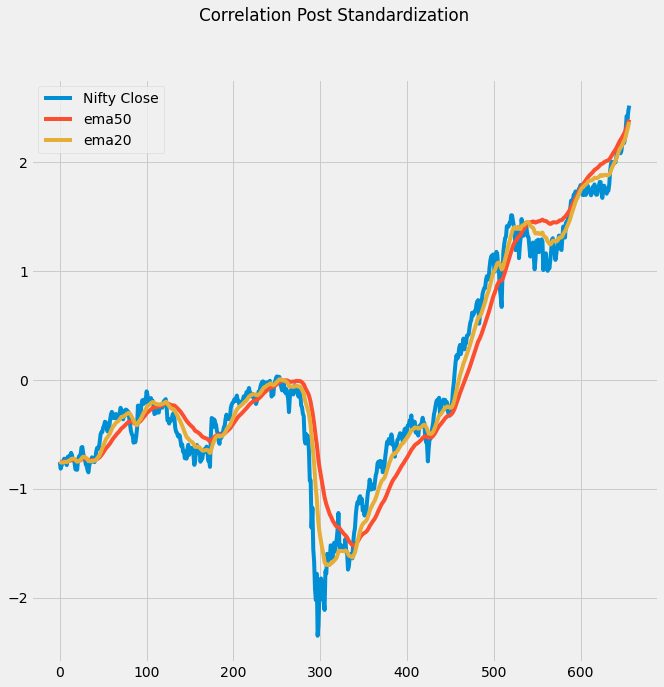

In [64]:
columns=['Nifty Close','ema50','ema20']
standard_df.columns=columns
standard_df[:].plot(figsize=(10,10))
plt.suptitle('Correlation Post Standardization')
plt.show()

In [65]:
standard_df['diff']=standard_df['Nifty Close']-standard_df['ema50']
standard_df['diff_2']=standard_df['Nifty Close']-standard_df['ema20']
standard_df['dif']=standard_df['diff']-standard_df['diff_2']

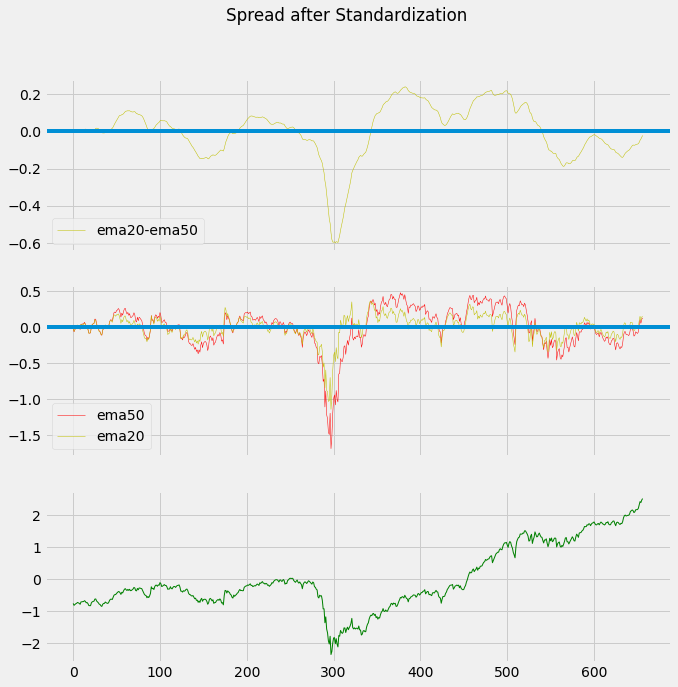

In [68]:
plt.rcParams["figure.figsize"] = (10,10)
fig,ax=plt.subplots(3,1,sharex=True)
ax[1].plot(standard_df['diff'],linewidth=0.5,color='r',label='ema50')
ax[1].plot(standard_df['diff_2'],linewidth=0.5,color='y',label='ema20')
ax[0].plot(standard_df['dif'],linewidth=0.5,color='y',label='ema20-ema50')
ax[2].plot(standard_df['Nifty Close'],linewidth=1,color='g')
ax[0].axhline(y=-0)
ax[1].axhline(y=-0)
plt.suptitle('Spread after Standardization')
ax[0].legend()
ax[1].legend()
plt.show()